### 케라스, 텐서플로우 버전 확인

In [4]:
import keras
keras.__version__

'2.3.1'

In [5]:
import tensorflow as tf
tf.__version__

'2.0.0'

### 사용 라이브러리 및 이미지 불러오기

In [1]:
import warnings
warnings.filterwarnings('ignore')

from keras import models, layers
from keras.callbacks import ModelCheckpoint,EarlyStopping
import cv2
from glob import glob
import os
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import tensorflow as tf
from tensorflow import keras

from keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
img_data = glob('C:\\Users\\82106\\Desktop\\sw_0601\\pokemon_g\\*.jpg')
class_name = ['Charmander', 'Gastly', 'Goldeen', 'Gyarados', 'Horsea', 'Mew', 'Mewtwo', 'Pikachu', 'Poliwag', 'Squirtle']
dic = {'Charmander':0,'Gastly':1,'Goldeen':2,'Gyarados':3,'Horsea':4,'Mew':5,'Mewtwo':6,'Pikachu':7,'Poliwag':8,'Squirtle':9}
dic2 = {0:'Charmander',1:'Gastly',2:'Goldeen',3:'Gyarados',4:'Horsea',5:'Mew',6:'Mewtwo',7:'Pikachu',8:'Poliwag',9:'Squirtle'}

In [37]:
#데이터들을 담을 리스트 정의
X_all = list()
#레이블들을 담을 리스트 정의
Y_all = list()       


for imagename in img_data:       
    try:                      
        img = cv2.imread(imagename) 
        img = cv2.resize(img, dsize=(128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    
        image = np.array(img)  
        X_all.append(img)            
    
        label = imagename.split('\\')   
        label = label[6] 
        label = label.split('.')  
        label = str(label[0])    
        label = dic[label] 
        Y_all.append(label)         
    except :  
        pass # 예외
        

# X, Y리스트들을 NP형식의 배열로 생성    
X_all = np.array(X_all)  
Y_all = np.array(Y_all)

print(X_all)
print(Y_all)
print('X_all shape: ', X_all.shape)
print('Y_all shape: ', Y_all.shape)

[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0

### train, test 데이터셋 분리

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X_all, Y_all, test_size = 0.2, shuffle=True, random_state=44)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4169, 128, 128, 3)
(1043, 128, 128, 3)
(4169,)
(1043,)


In [39]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)
X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255

print('X_train_shape: ', X_train.shape)
print('X_test_shape: ', X_test.shape)
print(X_train[:5])
print(X_test[:5])

X_train_shape:  (4169, 128, 128, 3)
X_test_shape:  (1043, 128, 128, 3)
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.        

In [40]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)
print('Y_train_shape:', Y_train.shape)
print('Y_test_shape', Y_test.shape)

Y_train_shape: (4169, 10)
Y_test_shape (1043, 10)


### CNN 모델 적용 및 평가

In [41]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)             

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience=5, verbose=1)

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=40, epochs=20, verbose=1, callbacks = [early_stopping])

Epoch 1/20
4169/4169 [==============================] - 51s 12ms/step - loss: 1.9774 - accuracy: 0.3416
Epoch 2/20
4169/4169 [==============================] - 52s 13ms/step - loss: 0.9654 - accuracy: 0.6906
Epoch 3/20
4169/4169 [==============================] - 53s 13ms/step - loss: 0.5360 - accuracy: 0.8328
Epoch 4/20
4169/4169 [==============================] - 54s 13ms/step - loss: 0.2967 - accuracy: 0.9081
Epoch 5/20
4169/4169 [==============================] - 56s 14ms/step - loss: 0.2000 - accuracy: 0.9384
Epoch 6/20
4169/4169 [==============================] - 56s 13ms/step - loss: 0.2073 - accuracy: 0.9393
Epoch 7/20
4169/4169 [==============================] - 56s 13ms/step - loss: 0.1159 - accuracy: 0.9679
Epoch 8/20
4169/4169 [==============================] - 57s 14ms/step - loss: 0.0889 - accuracy: 0.9763
Epoch 9/20
4169/4169 [==============================] - 58s 14ms/step - loss: 0.0700 - accuracy: 0.9822
Epoch 10/20
4169/4169 [==============================] - 57s 14m

In [9]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1043/1043 [==============================] - 0s 297us/step
Test score: 0.3161196587151872
Test accuracy: 0.9213806390762329


### 문제: 오토인코더로 생성한 사진을 내 컴퓨터에 저장시킨 후 어떤 캐릭터인지 예측
생성된 사진 개수: test 데이터인 4032개와 동일하게 4032개 생성됨

In [21]:
ae_images = glob('C:\\Users\\82106\\Desktop\\sw_0601\\auto_image\\*.jpg') # ae로 생성한 이미지의 경로

ae_test = list()        
for img in ae_images:       
    try:                          
        img = cv2.imread(img) 
        img = cv2.resize(img, dsize=(32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
        img = np.array(img)
        ae_test.append(img)          
    except :   
        pass

ae_test = np.array(ae_test)   

ae_test = ae_test.astype('float') / 255

predict_classes = np.argmax(model.predict(ae_test), axis = 1)
print(predict_classes### CNN 모델 적용 및 평가)

[2 8 9 ... 6 3 0]


In [18]:
print(len(predict_classes))

4032


Text(0.5, 1.0, 'Pikachu')

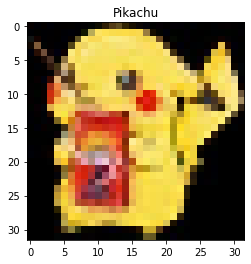

In [30]:
dic_pr = {0:'Charmander',1:'Gastly',2:'Goldeen',3:'Gyarados',4:'Horsea',5:'Mew',6:'Mewtwo',7:'Pikachu',8:'Poliwag',9:'Squirtle'}

import random
rn = random.randint(1,4032)
rn_predict = predict_classes[rn]
plt.imshow(ae_test[rn])
plt.title('{}'.format(dic_pr[rn_predict]))

Text(0.5, 1.0, 'Poliwag')

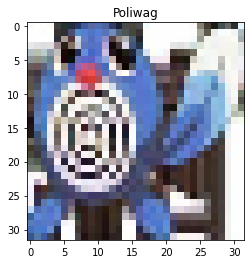

In [36]:
dic_pr = {0:'Charmander',1:'Gastly',2:'Goldeen',3:'Gyarados',4:'Horsea',5:'Mew',6:'Mewtwo',7:'Pikachu',8:'Poliwag',9:'Squirtle'}

import random
rn = random.randint(1,4032)
rn_predict = predict_classes[rn]
plt.imshow(ae_test[rn])
plt.title('{}'.format(dic_pr[rn_predict]))